In [1]:
"""
https://www.youtube.com/watch?v=SToqP9V9y7Q
"""

'\nhttps://www.youtube.com/watch?v=SToqP9V9y7Q\n'

In [25]:
# for building model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# for understanding the resolt and analize the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

# python libreries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
"""
Here we are loading the fashion_mnist dataset from keras.
"""
mnist = keras.datasets.fashion_mnist

In [4]:
"""
Now we load the data into real variables using load_data().
It return 2 tuples.
The first tupes has the training data and the second tuple has the test data.
"""
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
"""
By using shape we can see that it has 60,000 images for training and each image is
of size 28×28 in X_train and a corresponding label for each image in y_train.
"""
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [6]:
"""
These are all the class name in their proper order.
top is encoded as 0, trouser is encoded as 1 and so on.
"""
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

### Data Exploration

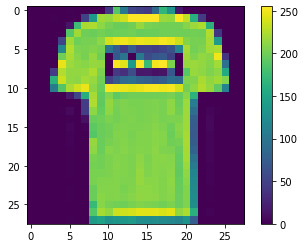

In [7]:
# creating a new figure
plt.figure()
# display data as an image
plt.imshow(X_train[1])
# add a colorbar to a plot
plt.colorbar()

In [8]:
"""
np.max() gives the maximum value. Hence the maximum value in X_train is 255.
"""
np.max(X_train)

255

In [9]:
"""
Neural Network model doesn’t take value greater than 1.
So we need to bring all the values between 0 and 1. 
To do this we will divide all the values in the training and testing dataset by 255
as the greatest value in our dataset is 255.
"""

X_train = X_train/255.0
X_test = X_test/255.0

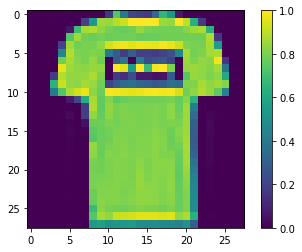

In [10]:
# creating a new figure
plt.figure()
# display data as an image
plt.imshow(X_train[1])
# add a colorbar to a plot
plt.colorbar()

In [11]:
# Sequential means one input and one output
model = Sequential()
# converting the data into a 1-dimensional array for inputting it to the next layer
model.add(Flatten(input_shape = (28, 28)))
# relu removes the negative values (converting them to zero)
model.add(Dense(32, activation = 'relu'))
# The softmax function is a more generalized logistic activation function,
# which is used for multiclass classification.
model.add(Dense(10, activation = 'softmax'))

In [12]:
"""
sparse_categorical_crossentropy - produces a category index of the most likely matching category.

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent
procedure to update network weights iterative based in training data.
Adam is a popular algorithm in the field of deep learning because it achieves good results fast.
"""
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.7004 - accuracy: 0.7561 - val_loss: 0.4241 - val_accuracy: 0.8502
Epoch 2/10
4800/4800 [==============================] - 5s 1ms/step - loss: 0.4129 - accuracy: 0.8519 - val_loss: 0.3973 - val_accuracy: 0.8572
Epoch 3/10
4800/4800 [==============================] - 4s 898us/step - loss: 0.3762 - accuracy: 0.8624 - val_loss: 0.3858 - val_accuracy: 0.8593
Epoch 4/10
4800/4800 [==============================] - 4s 822us/step - loss: 0.3565 - accuracy: 0.8685 - val_loss: 0.3717 - val_accuracy: 0.8674
Epoch 5/10
4800/4800 [==============================] - 4s 817us/step - loss: 0.3397 - accuracy: 0.8757 - val_loss: 0.3515 - val_accuracy: 0.8727
Epoch 6/10
4800/4800 [==============================] - 4s 816us/step - loss: 0.3271 - accuracy: 0.8800 - val_loss: 0.3534 - val_accuracy: 0.8742
Epoch 7/10
4800/4800 [==============================] - 4s 813us/step - loss: 0.3135 - accuracy: 0.8850 - val_loss: 0.3661 - val

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_acc)

313/313 [==============================] - 0s 959us/step - loss: 0.3738 - accuracy: 0.8681
0.8680999875068665


In [15]:
# predicting the hole set
Y_pred = np.argmax(model.predict(X_test), axis=-1)

# Plotting Learning Curve and Confusion Matrix in TensorFlow

In [16]:
# history is a history that was returnd from training the model (all metrics for all epochs).
history.history

{'loss': [0.5347806811332703,
  0.40649691224098206,
  0.37253060936927795,
  0.3555391728878021,
  0.3368408679962158,
  0.3236529529094696,
  0.31498396396636963,
  0.3055880665779114,
  0.2950121760368347,
  0.29092782735824585],
 'accuracy': [0.812583327293396,
  0.8542708158493042,
  0.8651875257492065,
  0.8698541522026062,
  0.8771041631698608,
  0.8820624947547913,
  0.8836874961853027,
  0.8871458172798157,
  0.8897291421890259,
  0.8921250104904175],
 'val_loss': [0.4240800440311432,
  0.39725184440612793,
  0.38576576113700867,
  0.3717480003833771,
  0.35148918628692627,
  0.35336562991142273,
  0.3660883903503418,
  0.34824612736701965,
  0.35529229044914246,
  0.35205912590026855],
 'val_accuracy': [0.8501666784286499,
  0.8571666479110718,
  0.859333336353302,
  0.8674166798591614,
  0.8727499842643738,
  0.8742499947547913,
  0.8675833344459534,
  0.8763333559036255,
  0.874750018119812,
  0.8777499794960022]}

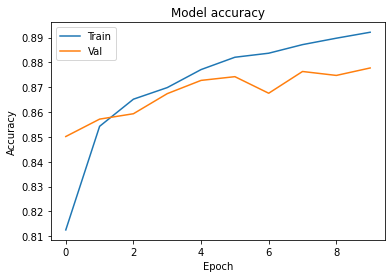

In [17]:
#plot train accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

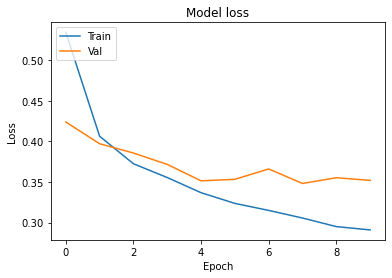

In [18]:
#plot train loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

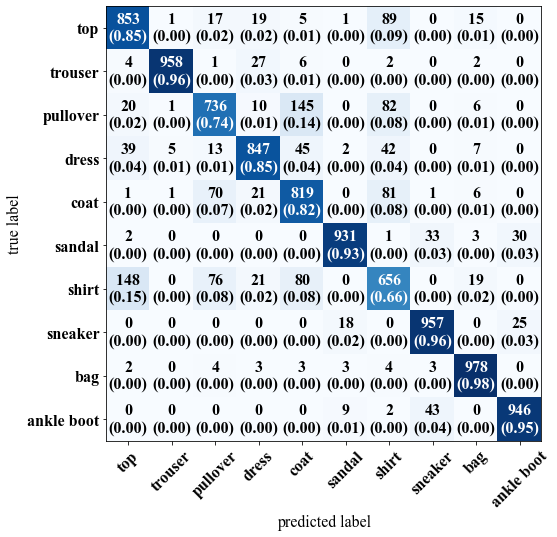

In [27]:
font = {
    'family': 'Times New Roman',
    'weight': 'bold',
    'size': 16
}

matplotlib.rc('font', **font)

mat = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8), class_names=class_names, show_normed=True)